In [1]:
# imports and setup

# I have hcipy as a submodule, so this import may vary
import sys
sys.path.append("..")
from hcipy.hcipy import *

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats, signal, optimize

from aberrations import *

In [2]:
time_id = 5
f_sampling = 1000
steps = int(f_sampling * time_id)

conversion = (wavelength / D) * 206265000 / focal_samples
wf = Wavefront(aperture, wavelength) # can induce a specified TT here if desired

tt_cms = np.zeros((steps, 2))
for n in range(steps):
    if n % 1000 == 0:
        print(n)
    wf = Wavefront(aperture, wavelength)
    for layer in layers:
        layer.evolve_until(n / f_sampling)
        wf = layer(wf)
    tt_cms[n] = center_of_mass(prop(wf).intensity)

tt_cms *= conversion # pixels to mas

0
1000
2000
3000
4000


Text(0.5, 1.0, 'Atmospheric tip-tilts')

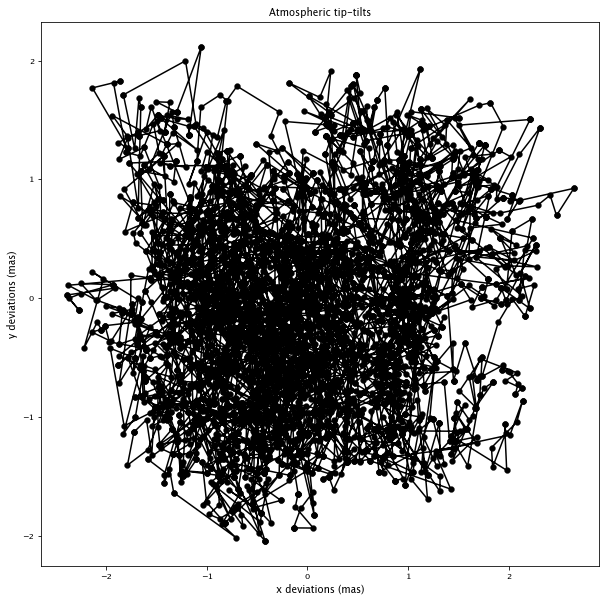

In [3]:
plt.figure(figsize=(10,10))
plt.plot(tt_cms[:,0], tt_cms[:,1], 'ko-')
plt.xlabel("x deviations (mas)")
plt.ylabel("y deviations (mas)")
plt.title("Atmospheric tip-tilts")

turbulence m = -1.4303793935459395


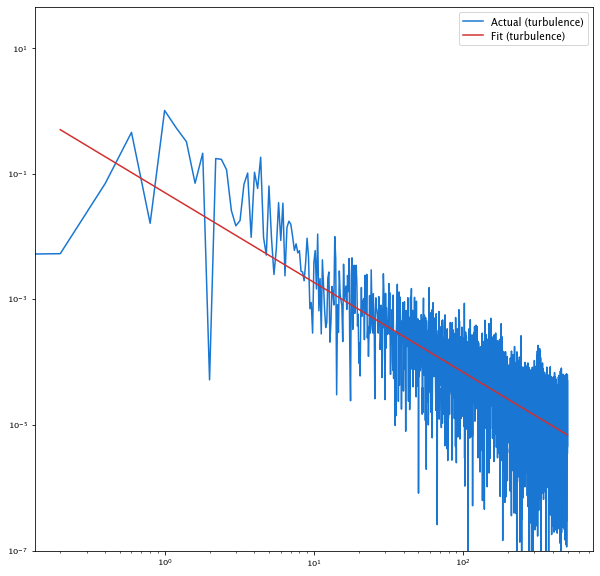

In [4]:
# plotting the PSD of just one dimension, expecting an f^-2 power law
plt.figure(figsize=(10,10))
freqs, psd = signal.periodogram(tt_cms[:,0], f_sampling)
log_freqs, log_power = np.log(freqs[1:]), np.log(psd[1:])
m, b, _, _, _ = stats.linregress(log_freqs, log_power)

def plot_powerlaw(aberration, description):
    freqs, psd = signal.periodogram(aberration, f_sampling)
    log_freqs, log_power = np.log(freqs[1:]), np.log(psd[1:])
    m, b = stats.linregress(log_freqs, log_power)[:2]
    print(description + " m =", m)
    plt.loglog(freqs, psd, label='Actual (' + description + ')')
    plt.loglog(freqs[1:], np.exp(b) * freqs[1:]**m, label='Fit (' + description + ')')
    plt.ylim(1e-7)
    plt.legend()
    
plot_powerlaw(tt_cms[:,0], "turbulence")

In [5]:
np.save('./turbulence.npy', tt_cms)